In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
import pandas as pd

data = pd.read_csv("../../MUMBAI HOUSE PRICE PREDICTOR/notebook/data/mumbaihouse.csv")


In [3]:
data["PRICE"] = data[("PRICE")]



In [4]:
data.head()

,Area,Location,No_of_Bedrooms,New_Resale,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,_24x7_Security,Childrens_Play_Area,Clubhouse,Intercom,Landscaped_Gardens,Indoor_Games,Gas_Connection,Jogging_Track,Swimming_Pool,PRICE
0,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,5000000


In [5]:
data.tail()

,Area,Location,No_of_Bedrooms,New_Resale,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,_24x7_Security,Childrens_Play_Area,Clubhouse,Intercom,Landscaped_Gardens,Indoor_Games,Gas_Connection,Jogging_Track,Swimming_Pool,PRICE
1994,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,2300000
1995,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0,2000000
1996,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1,8300000
1997,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0,7400000
1998,826,Kolshet Industrial Area,2.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0,9500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 1999 non-null   int64  
 1   Location             1999 non-null   object 
 2   No_of_Bedrooms       1999 non-null   float64
 3   New_Resale           1999 non-null   int64  
 4   Gymnasium            1999 non-null   int64  
 5   Lift_Available       1999 non-null   int64  
 6   Car_Parking          1999 non-null   int64  
 7   Maintenance_Staff    1999 non-null   float64
 8   _24x7_Security       1999 non-null   int64  
 9   Childrens_Play_Area  1999 non-null   int64  
 10  Clubhouse            1999 non-null   int64  
 11  Intercom             1999 non-null   int64  
 12  Landscaped_Gardens   1999 non-null   int64  
 13  Indoor_Games         1999 non-null   int64  
 14  Gas_Connection       1999 non-null   int64  
 15  Jogging_Track        1999 non-null   i

In [7]:
# check null values
data.isnull().sum()

Area                   0
Location               0
No_of_Bedrooms         0
New_Resale             0
Gymnasium              0
Lift_Available         0
Car_Parking            0
Maintenance_Staff      0
_24x7_Security         0
Childrens_Play_Area    0
Clubhouse              0
Intercom               0
Landscaped_Gardens     0
Indoor_Games           0
Gas_Connection         0
Jogging_Track          0
Swimming_Pool          0
PRICE                  0
dtype: int64

In [8]:
# check duplicet values
data.duplicated().sum()

np.int64(0)

In [9]:
# hindel null values using median
data["No_of_Bedrooms"] = data["No_of_Bedrooms"].fillna(np.nanmedian(data["No_of_Bedrooms"]))
data["Maintenance_Staff"] = data["Maintenance_Staff"].fillna(np.nanmedian(data["Maintenance_Staff"]))

In [10]:
# saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Location'], dtype='object')
Index(['Area', 'No_of_Bedrooms', 'New_Resale', 'Gymnasium', 'Lift_Available',
       'Car_Parking', 'Maintenance_Staff', '_24x7_Security',
       'Childrens_Play_Area', 'Clubhouse', 'Intercom', 'Landscaped_Gardens',
       'Indoor_Games', 'Gas_Connection', 'Jogging_Track', 'Swimming_Pool',
       'PRICE'],
      dtype='object')


In [11]:
# check unice value of location
data['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [12]:
try:
    for i in numerical_features[:-1]:
        print(i,data[i].unique())
except Exception as e:
    print(e)

Area [ 720  600  650  665 2000 1550 1370 1356 1680  980 1000 1060 1095 1155
 1150 1250  990 1078  680 2470 2100 2200 2235 1025  950  895 1114 1197
 1380 1050 1240 1110 1160  555  700  646  560  670  740  636 1635 1500
 1850  610  655  660 1800 1645 1395 1200  615  765 1760 1415 1685 1650
 1390 1590 1716 1100 1147 1300  550  570  640 1700 1530 1750 1687 1400
 1780  625 1475  759  620  745  580 1845 1585 1350 1075  735 1505 1630
 1455 1098 1210 1440 1022 1675  900 1088  375 1717  750  525  420  540
  415 1105 2600 1296 1638 1465 2030 1450  800 1962 1785  775  910 1264
 1056 1810 1656 3888 3585 1404 1620 2780 1672 1840 1170  310 1245 1153
  573 1135 1054 1695 1579 2153 1872 1457  425  575  400  300 1600  860
 1320 2826 2880  997 1038 2800 1412  545  585 1014 5245  529  530 1260
  690 1265 1255 1055 1238 1165 1080 1470 1180 1735 1230  599 1654 1665
 1640  730 1020  715 1016  578  380 1067  780  671 1360  450  410 1168
  516  675  350  890  619  710  887 1005  638 1006  850  940  770  989
 

In [13]:
for i in numerical_features:
    print(i,data[i].value_counts())
    print("="*50)

Area Area
650     81
600     50
1050    41
1100    41
1000    34
        ..
1721     1
873      1
2730     1
833      1
3780     1
Name: count, Length: 638, dtype: int64
No_of_Bedrooms No_of_Bedrooms
2.0    802
1.0    678
3.0    422
4.0     75
5.0     17
6.0      3
7.0      2
Name: count, dtype: int64
New_Resale New_Resale
0    1559
1     440
Name: count, dtype: int64
Gymnasium Gymnasium
1    1103
0     896
Name: count, dtype: int64
Lift_Available Lift_Available
1    1577
0     422
Name: count, dtype: int64
Car_Parking Car_Parking
1    1836
0     163
Name: count, dtype: int64
Maintenance_Staff Maintenance_Staff
1.0    1389
0.0     610
Name: count, dtype: int64
_24x7_Security _24x7_Security
1    1799
0     200
Name: count, dtype: int64
Childrens_Play_Area Childrens_Play_Area
0    1325
1     674
Name: count, dtype: int64
Clubhouse Clubhouse
0    1227
1     772
Name: count, dtype: int64
Intercom Intercom
0    1366
1     633
Name: count, dtype: int64
Landscaped_Gardens Landscaped_Gardens
0

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,1999.0,1.093600e+03,6.650062e+02,220.0,650.0,1000.0,1290.0,8511.0
No_of_Bedrooms,1999.0,1.983492e+00,9.088749e-01,1.0,1.0,2.0,3.0,7.0
New_Resale,1999.0,2.201101e-01,4.144243e-01,0.0,0.0,0.0,0.0,1.0
Gymnasium,1999.0,5.517759e-01,4.974365e-01,0.0,0.0,1.0,1.0,1.0
Lift_Available,1999.0,7.888944e-01,4.081952e-01,0.0,1.0,1.0,1.0,1.0
Car_Parking,1999.0,9.184592e-01,2.737323e-01,0.0,1.0,1.0,1.0,1.0
Maintenance_Staff,1999.0,6.948474e-01,4.605872e-01,0.0,0.0,1.0,1.0,1.0
_24x7_Security,1999.0,8.999500e-01,3.001418e-01,0.0,1.0,1.0,1.0,1.0
Childrens_Play_Area,1999.0,3.371686e-01,4.728613e-01,0.0,0.0,0.0,1.0,1.0
Clubhouse,1999.0,3.861931e-01,4.869976e-01,0.0,0.0,0.0,1.0,1.0


<Axes: title={'center': 'Top 10 highest price Location'}, xlabel='Location', ylabel='PRICE'>

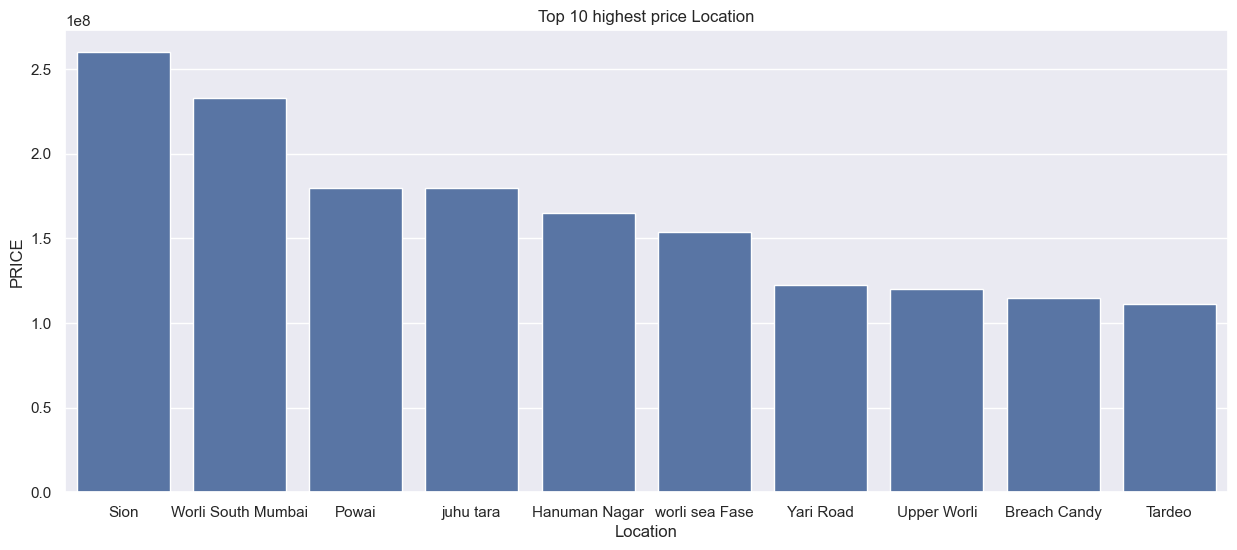

In [15]:
top10locations = data.groupby('Location')["PRICE"].mean().sort_values(ascending=False).reset_index().head(10)
plt.title("Top 10 highest price Location")
sns.barplot(x='Location',y="PRICE",data=top10locations)

<Axes: title={'center': 'Top 10 Lowest price Location'}, xlabel='Location', ylabel='PRICE'>

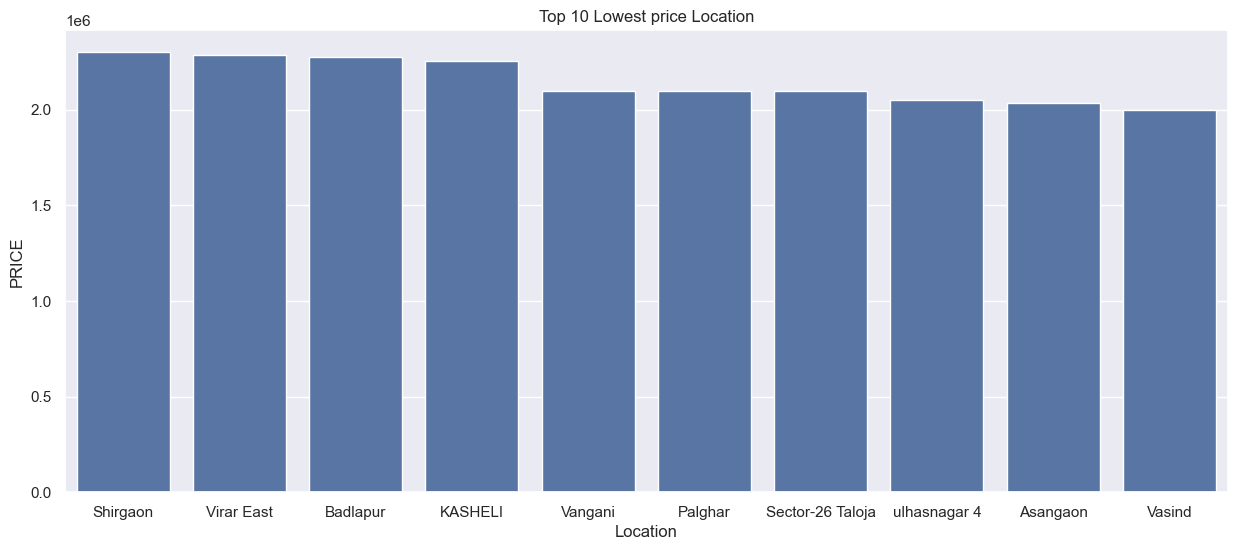

In [16]:
top10lowestlocations = data.groupby('Location')["PRICE"].mean().sort_values(ascending=False).reset_index().tail(10)
plt.title("Top 10 Lowest price Location")
sns.barplot(x='Location',y="PRICE",data=top10lowestlocations)

<Axes: title={'center': 'No_of_Bedrooms'}, xlabel='No_of_Bedrooms', ylabel='PRICE'>

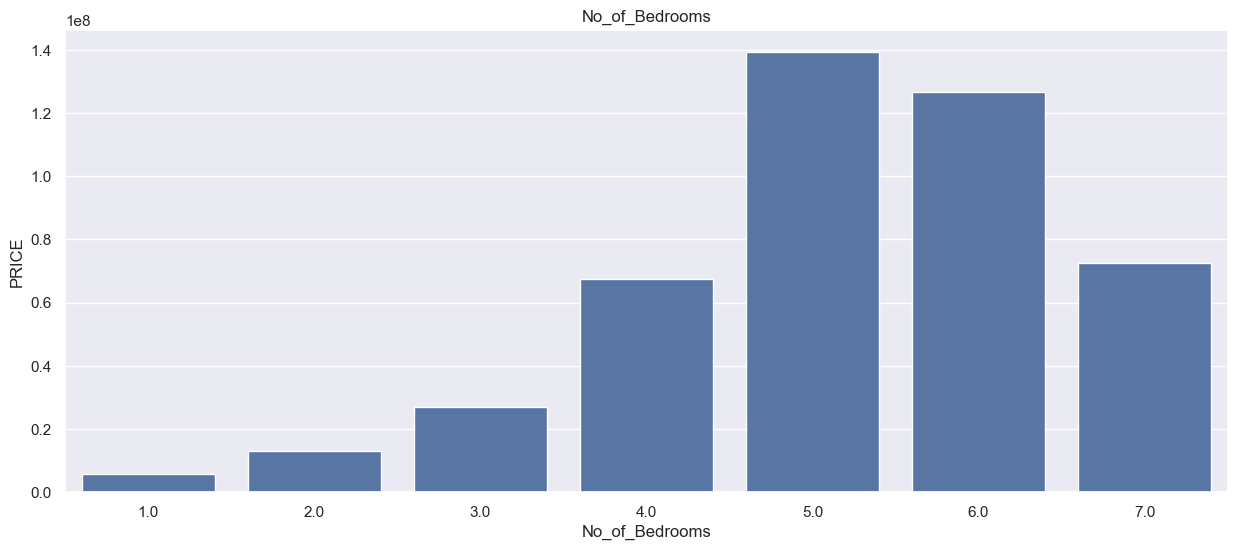

In [17]:
No_of_Bedrooms = data.groupby('No_of_Bedrooms')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("No_of_Bedrooms")
sns.barplot(x='No_of_Bedrooms',y="PRICE",data=No_of_Bedrooms)

<Axes: title={'center': 'New_Resale'}, xlabel='New_Resale', ylabel='PRICE'>

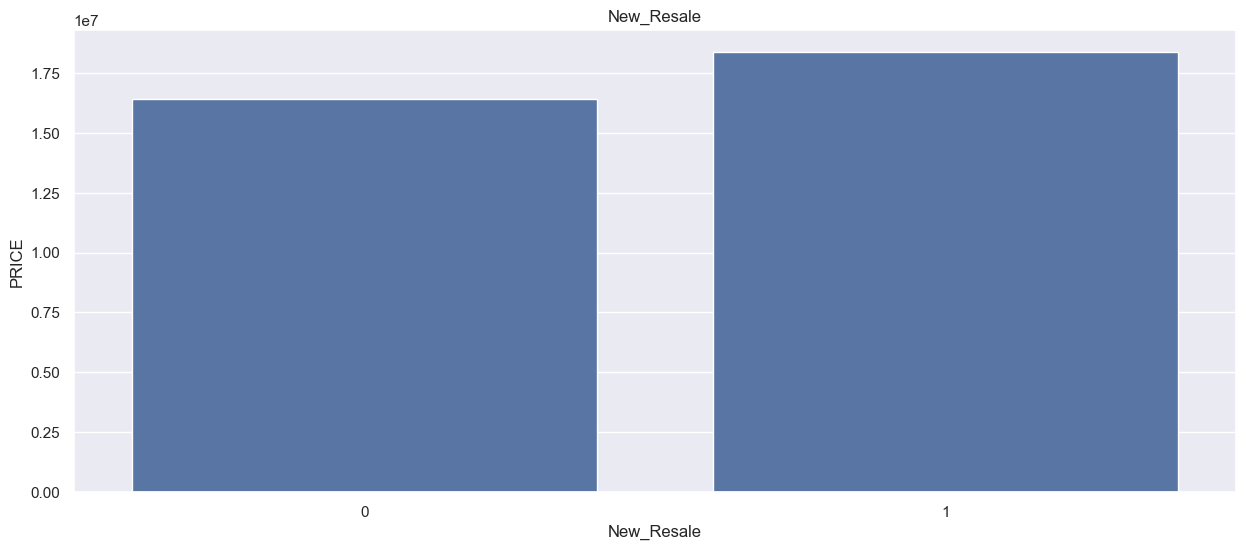

In [18]:
New_Resale = data.groupby('New_Resale')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("New_Resale")
sns.barplot(x='New_Resale',y="PRICE",data=New_Resale)

<Axes: title={'center': 'Gymnasium'}, xlabel='Gymnasium', ylabel='PRICE'>

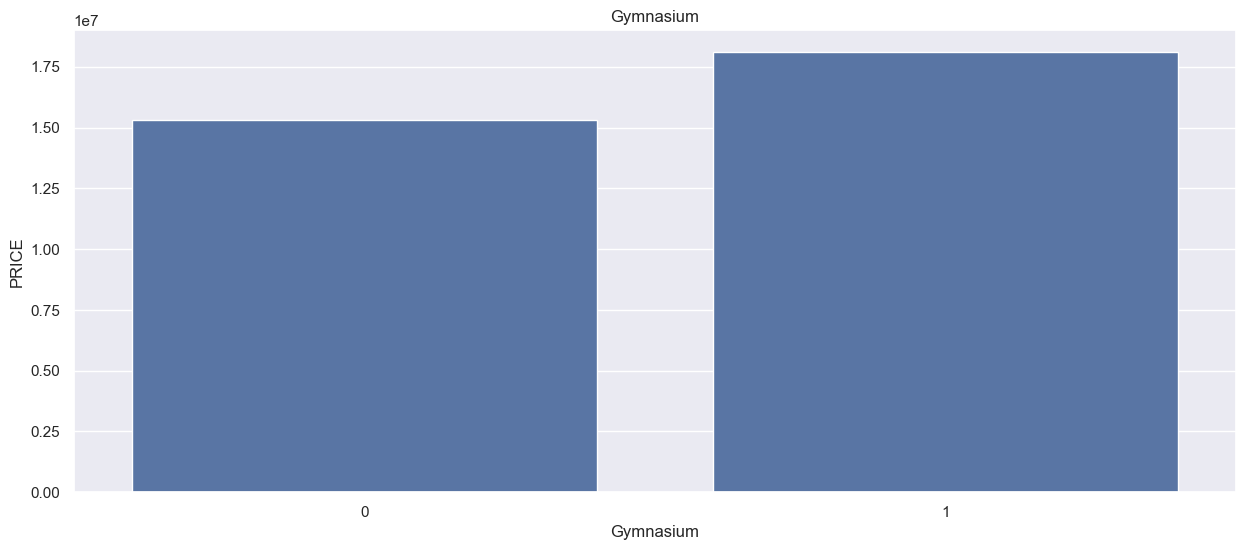

In [19]:
New_Resale = data.groupby('Gymnasium')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Gymnasium")
sns.barplot(x='Gymnasium',y="PRICE",data=New_Resale)

<Axes: title={'center': 'Lift_Available Vs Price'}, xlabel='Lift_Available', ylabel='PRICE'>

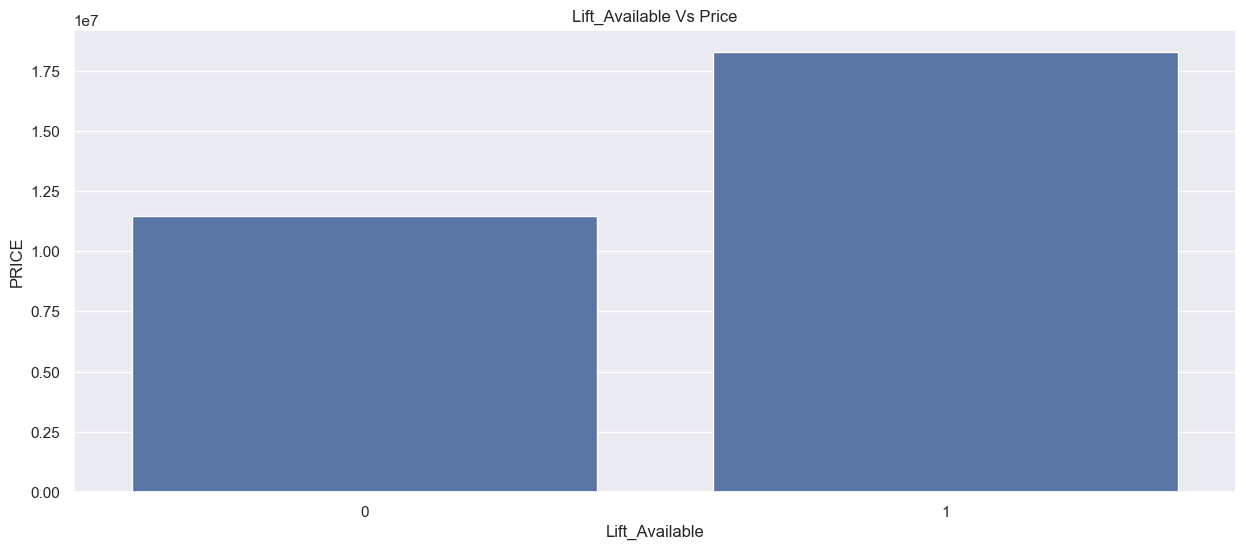

In [20]:
Lift_Available = data.groupby('Lift_Available')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Lift_Available Vs Price")
sns.barplot(x='Lift_Available',y="PRICE",data=Lift_Available)

<Axes: title={'center': 'Car_Parking Vs Price'}, xlabel='Car_Parking', ylabel='PRICE'>

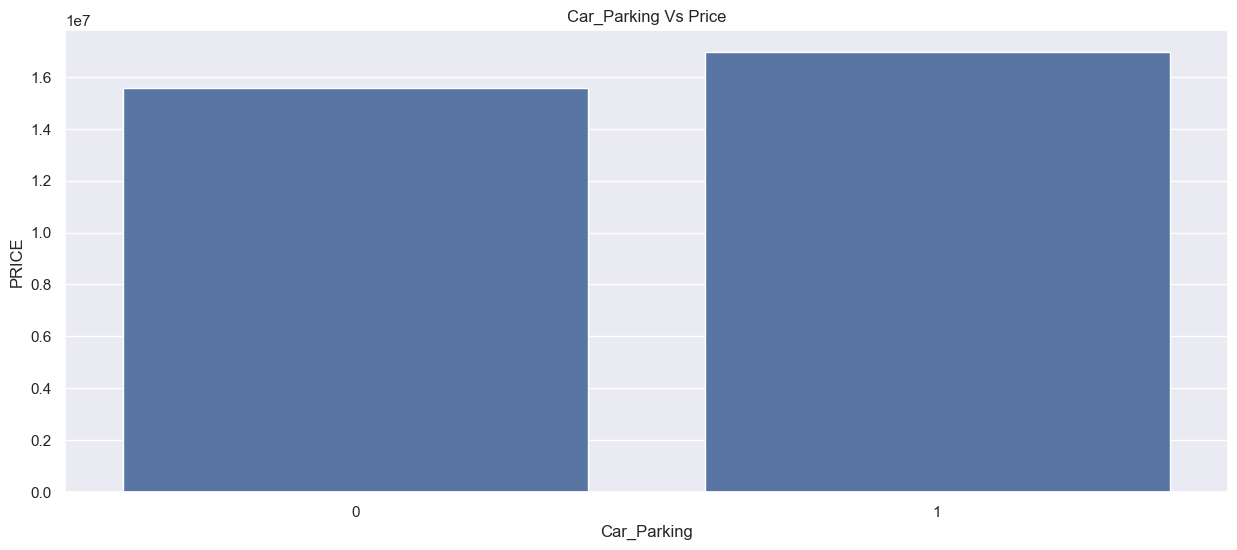

In [21]:
Car_Parking = data.groupby('Car_Parking')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Car_Parking Vs Price")
sns.barplot(x='Car_Parking',y="PRICE",data=Car_Parking)

<Axes: title={'center': 'Maintenance_Staff Vs Price'}, xlabel='Maintenance_Staff', ylabel='PRICE'>

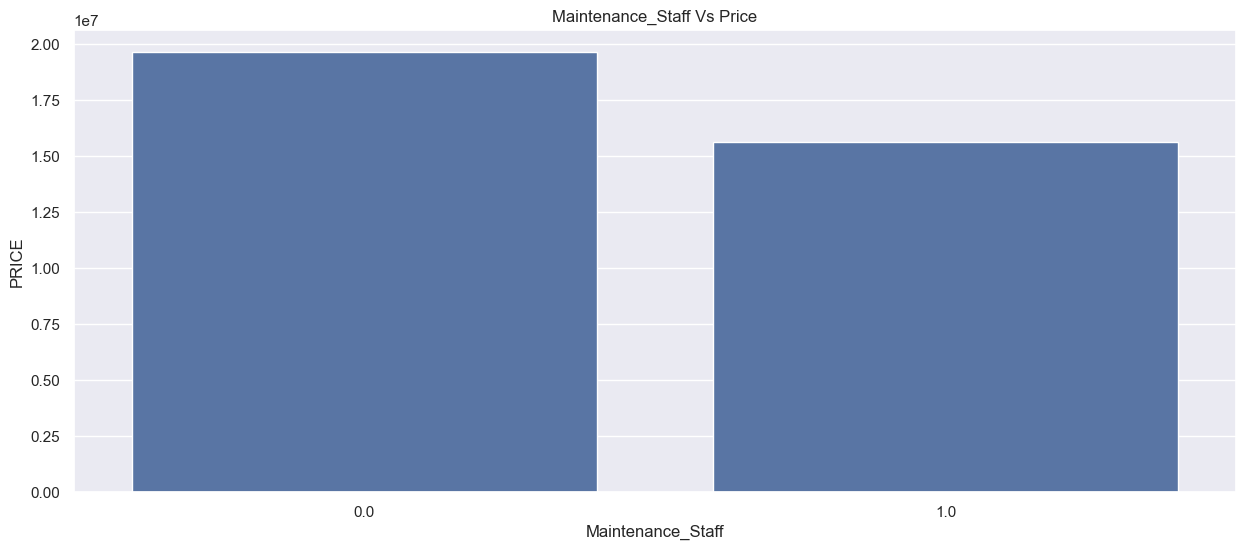

In [22]:
Maintenance_Staff = data.groupby('Maintenance_Staff')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Maintenance_Staff Vs Price")
sns.barplot(x='Maintenance_Staff',y="PRICE",data=Maintenance_Staff)

In [23]:
_24x7_Security = data.groupby('24x7_Security')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("24x7_Security Vs Price")
sns.barplot(x='24x7_Security',y="PRICE",data=_24x7_Security)

KeyError: '24x7_Security'

<Axes: title={'center': "Children's_Play_Area Vs Price"}, xlabel='Childrens_Play_Area', ylabel='PRICE'>

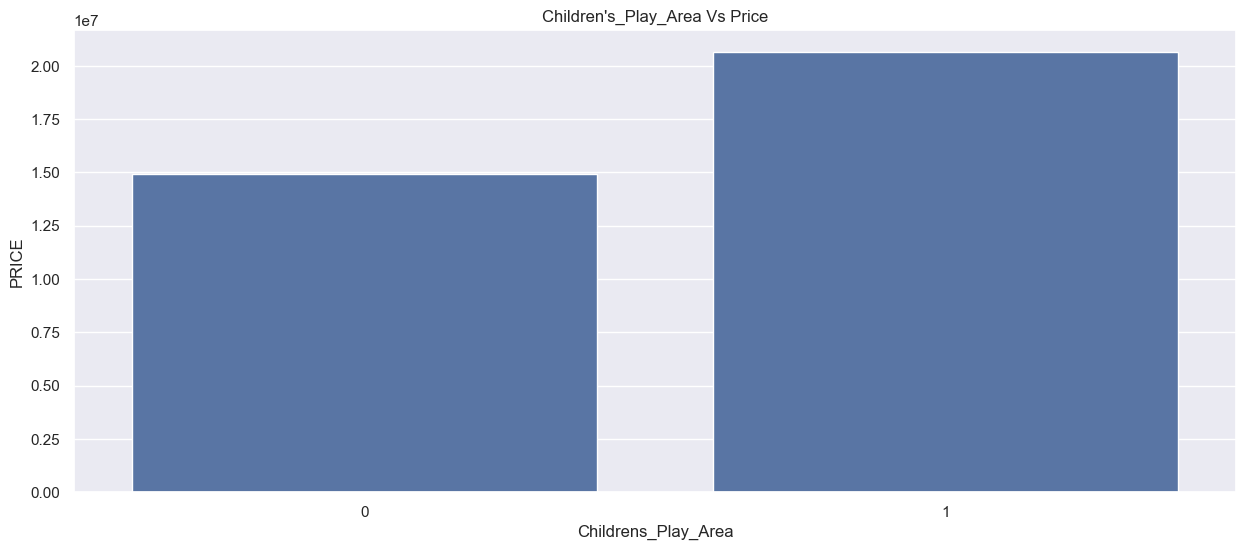

In [70]:
Childrens_Play_Area = data.groupby('Childrens_Play_Area')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Children's_Play_Area Vs Price")
sns.barplot(x='Childrens_Play_Area',y="PRICE",data=Childrens_Play_Area)

<Axes: title={'center': 'Clubhouse Vs Price'}, xlabel='Clubhouse', ylabel='PRICE'>

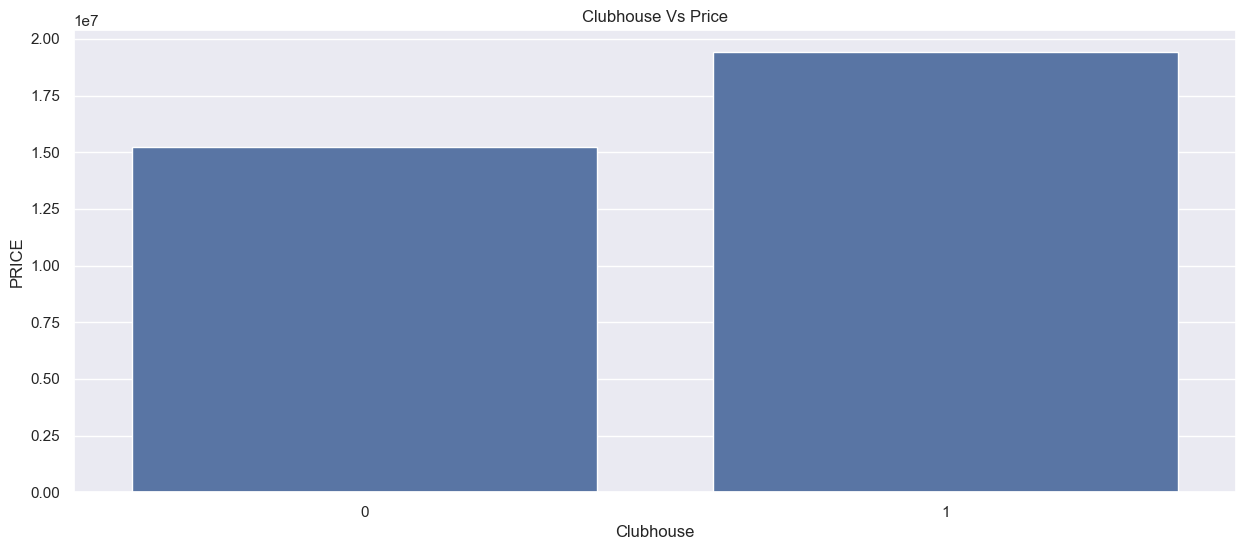

In [71]:
Clubhouse = data.groupby('Clubhouse')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Clubhouse Vs Price")
sns.barplot(x='Clubhouse',y="PRICE",data=Clubhouse)

<Axes: title={'center': 'Intercom Vs Price'}, xlabel='Intercom', ylabel='PRICE'>

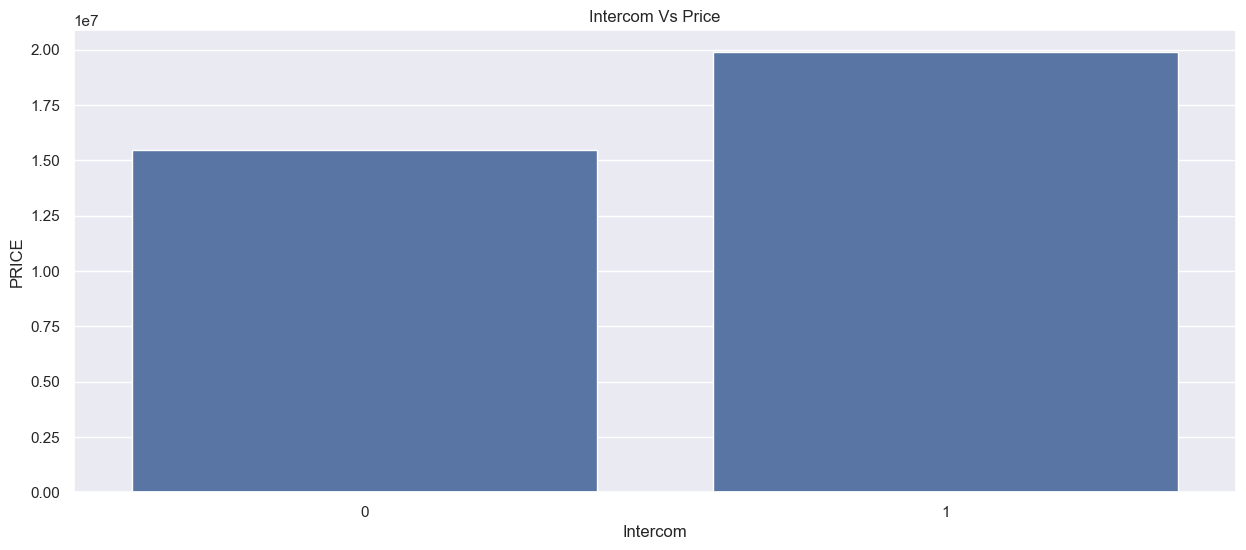

In [72]:
Intercom = data.groupby('Intercom')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Intercom Vs Price")
sns.barplot(x='Intercom',y="PRICE",data=Intercom)

<Axes: title={'center': 'Landscaped_Gardens Vs Price'}, xlabel='Landscaped_Gardens', ylabel='PRICE'>

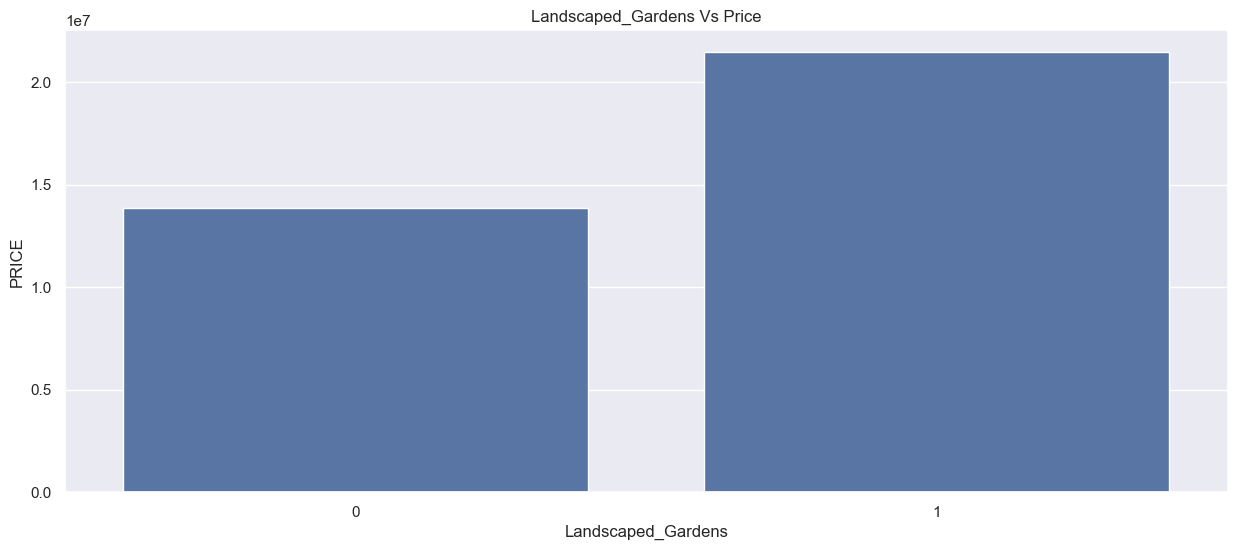

In [73]:
Landscaped_Gardens = data.groupby('Landscaped_Gardens')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Landscaped_Gardens Vs Price")
sns.barplot(x='Landscaped_Gardens',y="PRICE",data=Landscaped_Gardens)

<Axes: title={'center': 'Indoor_Games Vs Price'}, xlabel='Indoor_Games', ylabel='PRICE'>

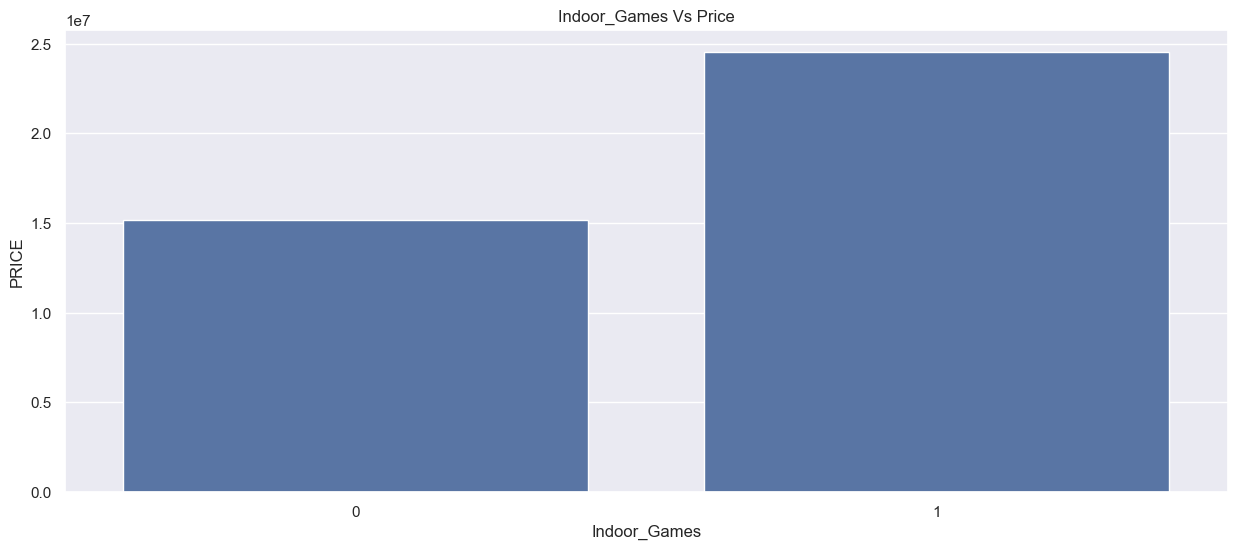

In [74]:
Indoor_Games = data.groupby('Indoor_Games')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Indoor_Games Vs Price")
sns.barplot(x='Indoor_Games',y="PRICE",data=Indoor_Games)

<Axes: title={'center': 'Gas_Connection Vs Price'}, xlabel='Gas_Connection', ylabel='PRICE'>

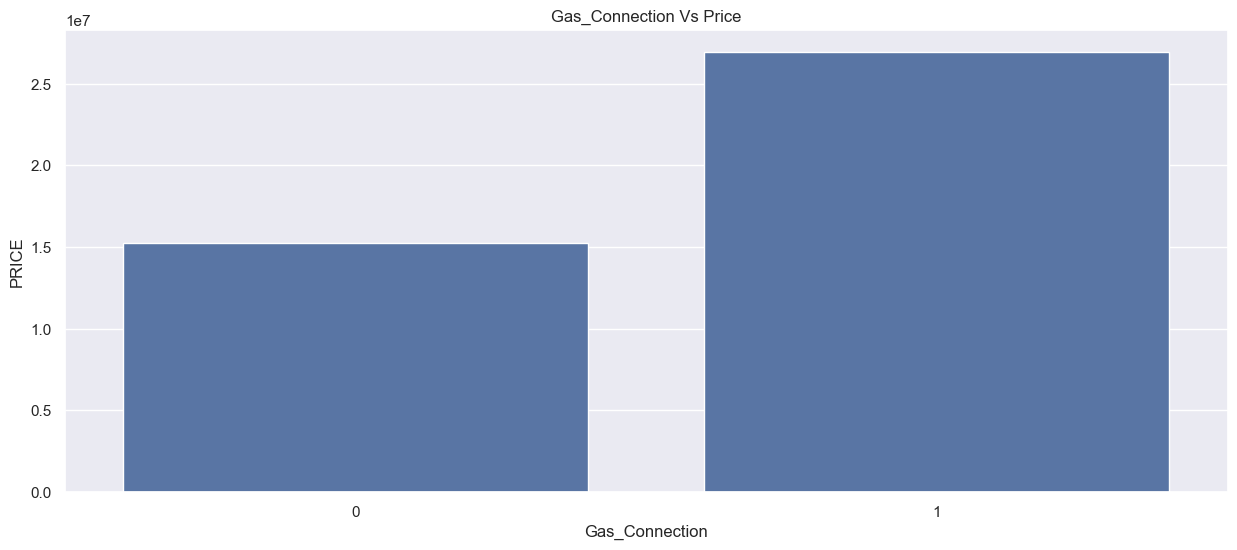

In [75]:
Gas_Connection = data.groupby('Gas_Connection')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Gas_Connection Vs Price")
sns.barplot(x='Gas_Connection',y="PRICE",data=Gas_Connection)

<Axes: title={'center': 'Jogging_Track Vs Price'}, xlabel='Jogging_Track', ylabel='PRICE'>

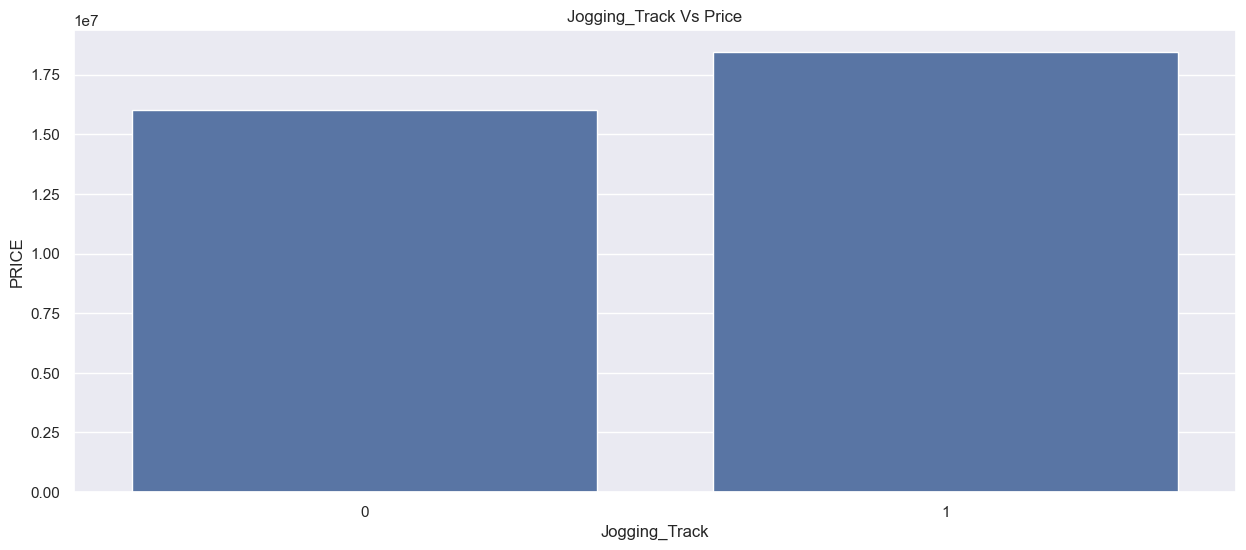

In [76]:
Jogging_Track = data.groupby('Jogging_Track')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Jogging_Track Vs Price")
sns.barplot(x='Jogging_Track',y="PRICE",data=Jogging_Track)

<Axes: title={'center': 'Swimming_Pool Vs Price'}, xlabel='Swimming_Pool', ylabel='PRICE'>

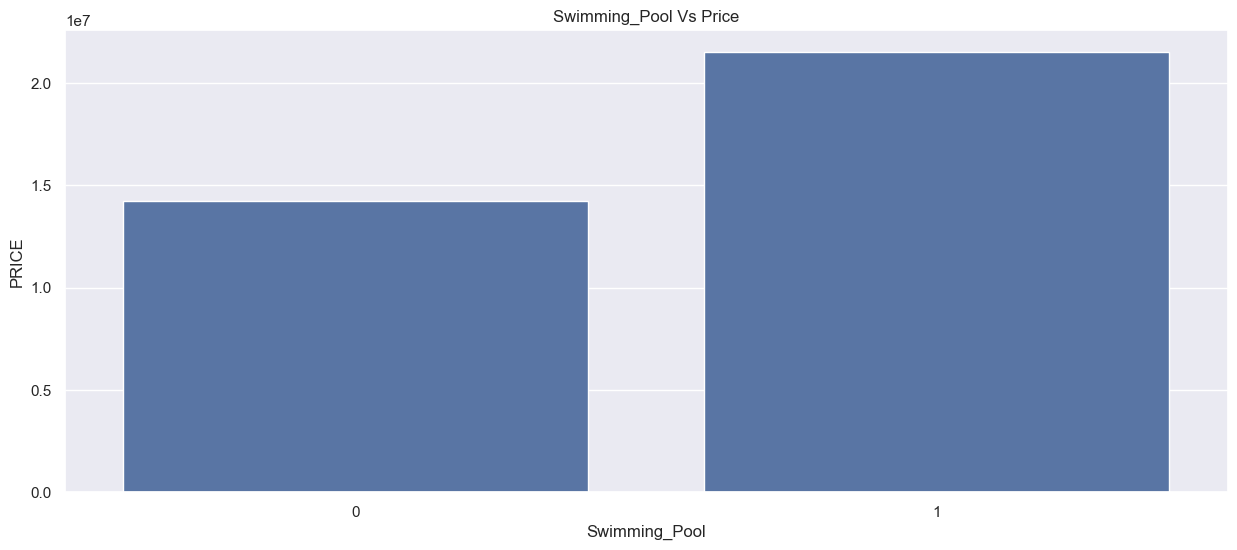

In [77]:
Swimming_Pool = data.groupby('Swimming_Pool')["PRICE"].mean().sort_values(ascending=False).reset_index()
plt.title("Swimming_Pool Vs Price")
sns.barplot(x='Swimming_Pool',y="PRICE",data=Swimming_Pool)

num must be an integer with 1 <= num <= 12, not 13


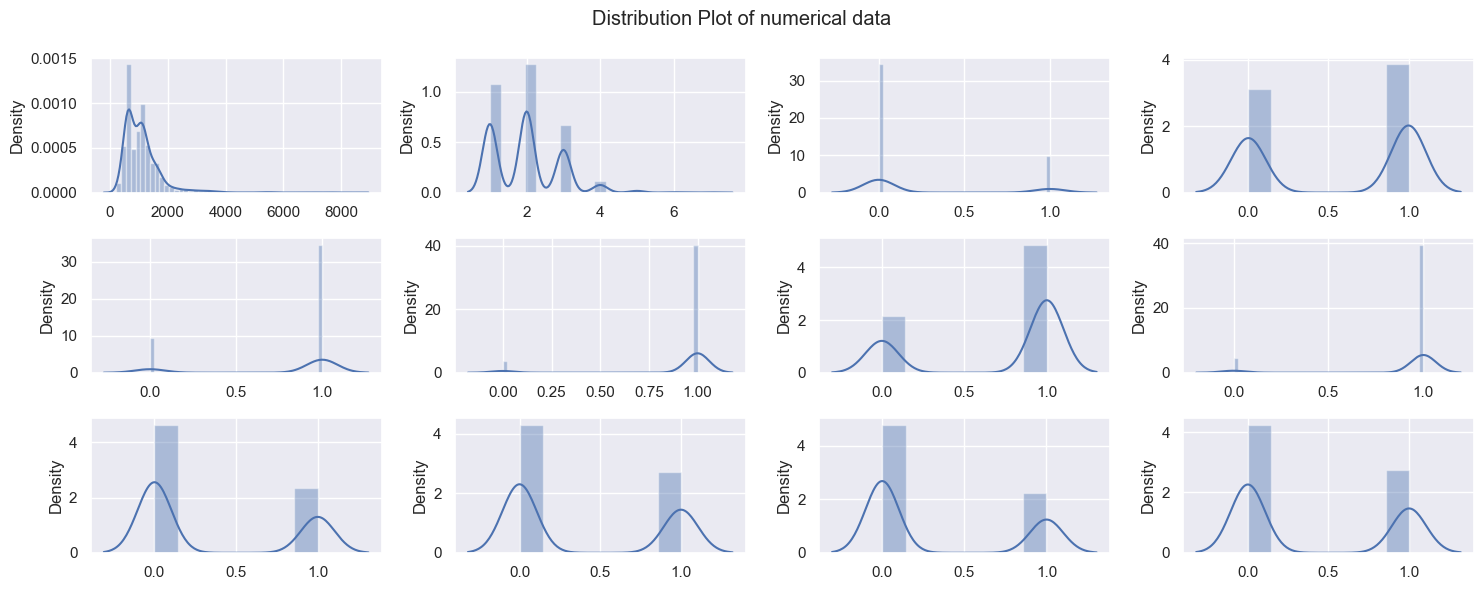

In [78]:
try:
    plt.suptitle("Distribution Plot of numerical data")
    for i in range(0,len(numerical_features[:-2])):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='PRICE', ylabel='Density'>

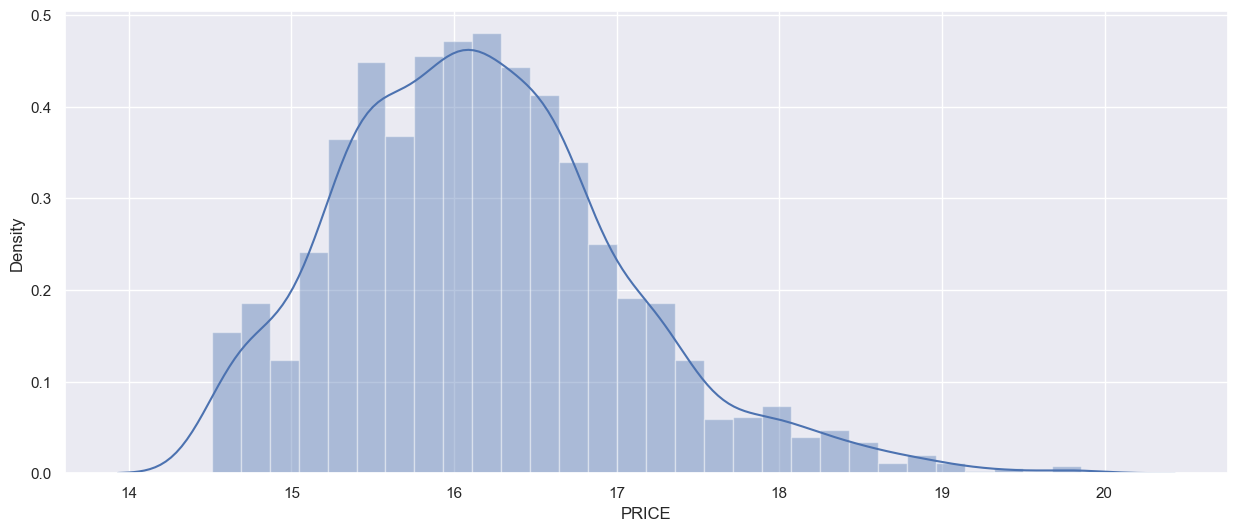

In [79]:
sns.distplot(np.log(data["PRICE"]))

num must be an integer with 1 <= num <= 12, not 13


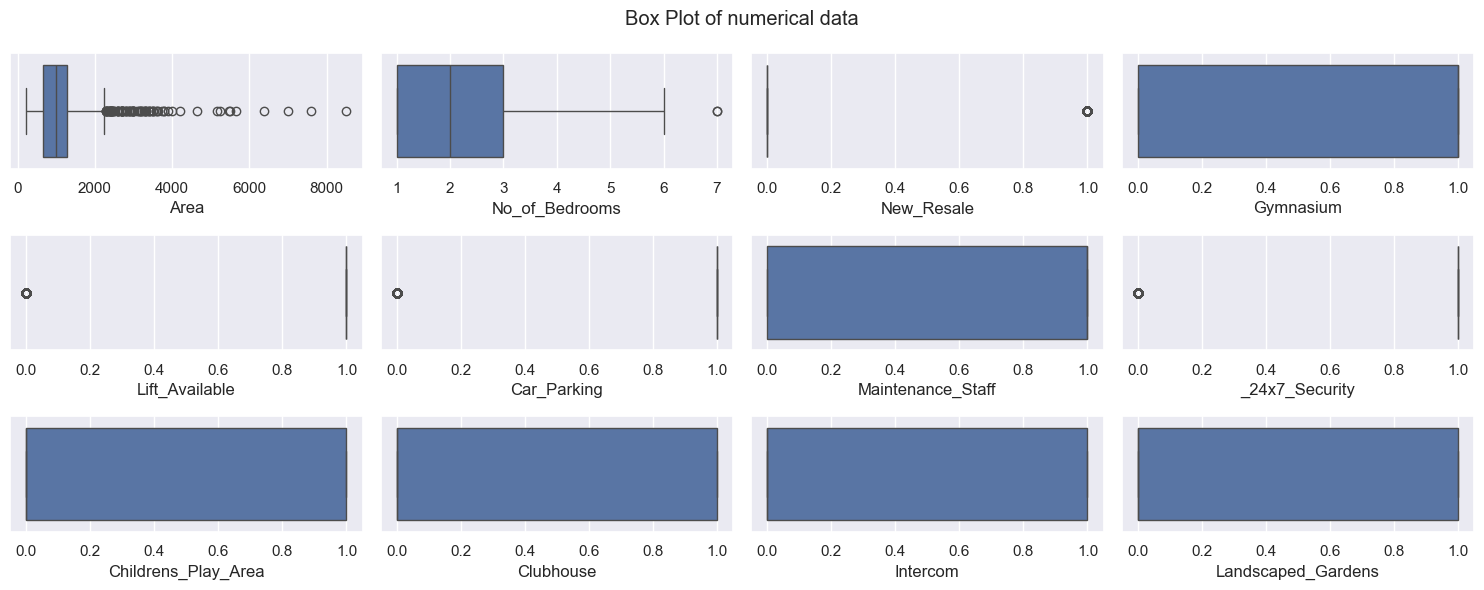

In [80]:
try:
    plt.suptitle("Box Plot of numerical data")
    for i in range(0,len(numerical_features[:-2])):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: ylabel='PRICE'>

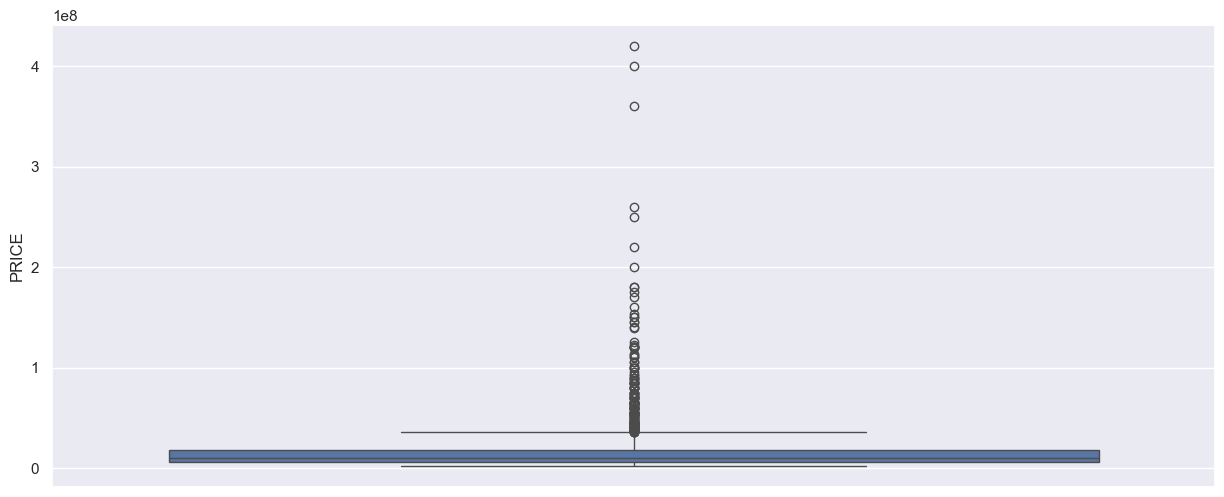

In [81]:
sns.boxplot(data["PRICE"])

num must be an integer with 1 <= num <= 12, not 13


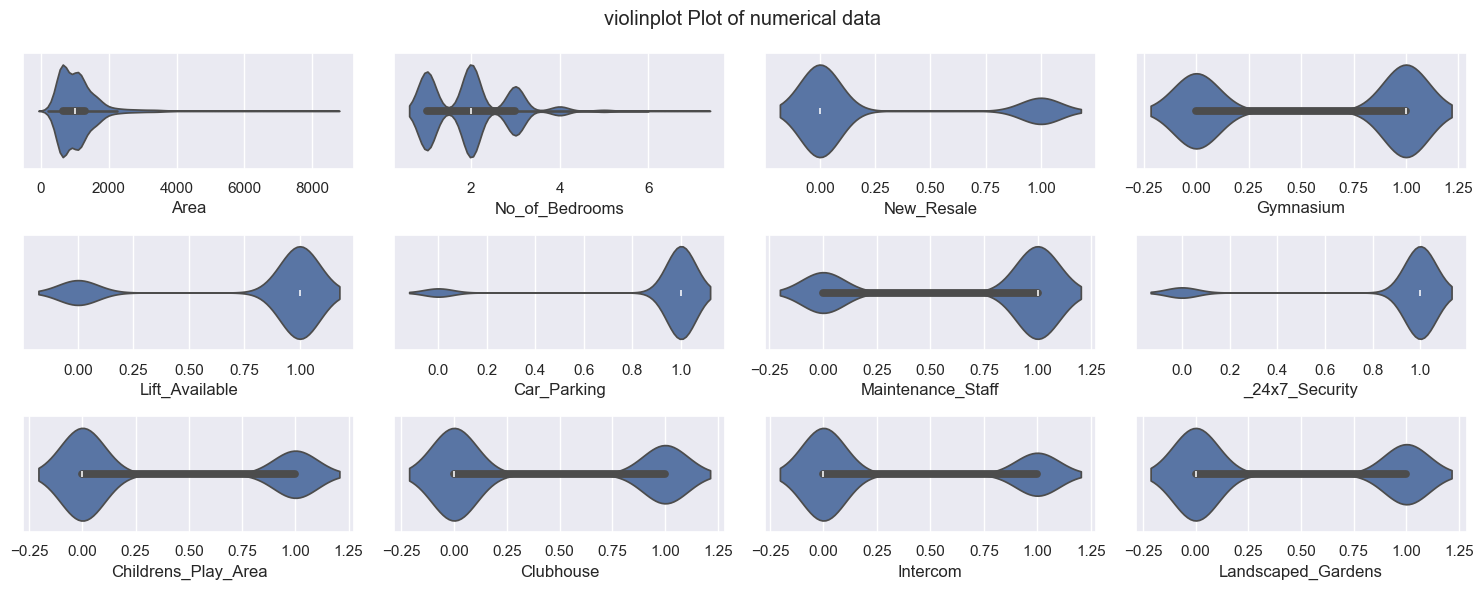

In [82]:
try:
    plt.suptitle("violinplot Plot of numerical data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: ylabel='PRICE'>

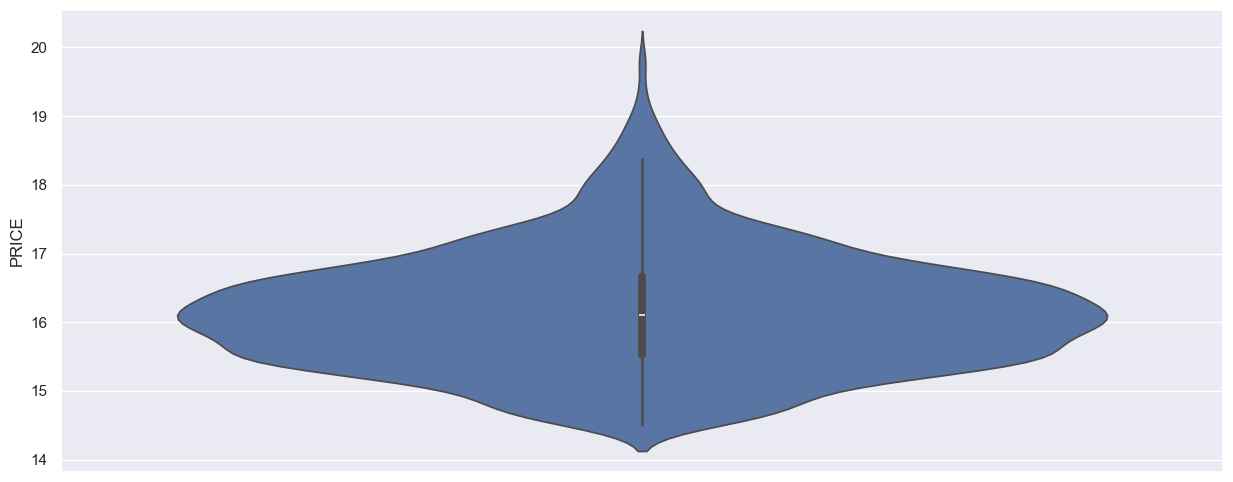

In [83]:
sns.violinplot(np.log(data["PRICE"]))

In [84]:
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'Kharghar'

# Model Traning

In [39]:
data

,Area,Location,No_of_Bedrooms,New_Resale,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,24x7_Security,Childrens_Play_Area,Clubhouse,Intercom,Landscaped_Gardens,Indoor_Games,Gas_Connection,Jogging_Track,Swimming_Pool,PRICE
0,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,2300000
1995,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0,2000000
1996,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1,8300000
1997,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0,7400000


In [40]:
# saprate dependent and independent features
x = data.drop("PRICE",axis=1)
y = np.log(data["PRICE"])

In [41]:
# saprate numerical and catigorical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Location'], dtype='object')
Index(['Area', 'No_of_Bedrooms', 'New_Resale', 'Gymnasium', 'Lift_Available',
       'Car_Parking', 'Maintenance_Staff', '24x7_Security',
       'Childrens_Play_Area', 'Clubhouse', 'Intercom', 'Landscaped_Gardens',
       'Indoor_Games', 'Gas_Connection', 'Jogging_Track', 'Swimming_Pool'],
      dtype='object')


In [42]:
from  sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
# Numeric Pipline 
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Catigorical Pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

# Get PReprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1599, 17)
(400, 17)
(1599,)
(400,)


In [46]:
# Apply Preprocessor object to transform data 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [48]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [49]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreeRegressor":ExtraTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 1.1067024205748944e+27
MAE 91105807467554.72
RMSE 332671372464613.25
R2 -1.4882577762348343e+27
Ridge
Model Traning Performance
MSE 13.863725341609518
MAE 23.725875948612426
RMSE 37.234023878180984
R2 81.35650861184865
Lesso
Model Traning Performance
MSE 74.37026287378053
MAE 67.68867601308699
RMSE 86.23819506099402
R2 -0.01073457943379097
Elastic
Model Traning Performance
MSE 58.5246610525941
MAE 60.10834194564521
RMSE 76.50141243963677
R2 21.297920476413413
SVR
Model Traning Performance
MSE 17.47274865459466
MAE 26.94278215159887
RMSE 41.80041704887005
R2 76.50321028132471
DecisionTreeRegressor
Model Traning Performance
MSE 32.44576202959784
MAE 38.25798140403133
RMSE 56.9611815446255
R2 56.3679840680839
ExtraTreeRegressor
Model Traning Performance
MSE 26.897055537410512
MAE 35.4544496466432
RMSE 51.86237126993956
R2 63.8297058747036
RandomForestRegressor
Model Traning Performance
MSE 17.5675289176452
MAE 28.660365864494757
RMSE 41.91363

In [50]:
trainig_score

[0.9276154995986271,
 0.9279248035185462,
 0.0,
 0.211271570300959,
 0.8896248915302416,
 0.9987004665255879,
 0.9987004665255879,
 0.9677120451258523]

Text(0, 0.5, 'Predictions')

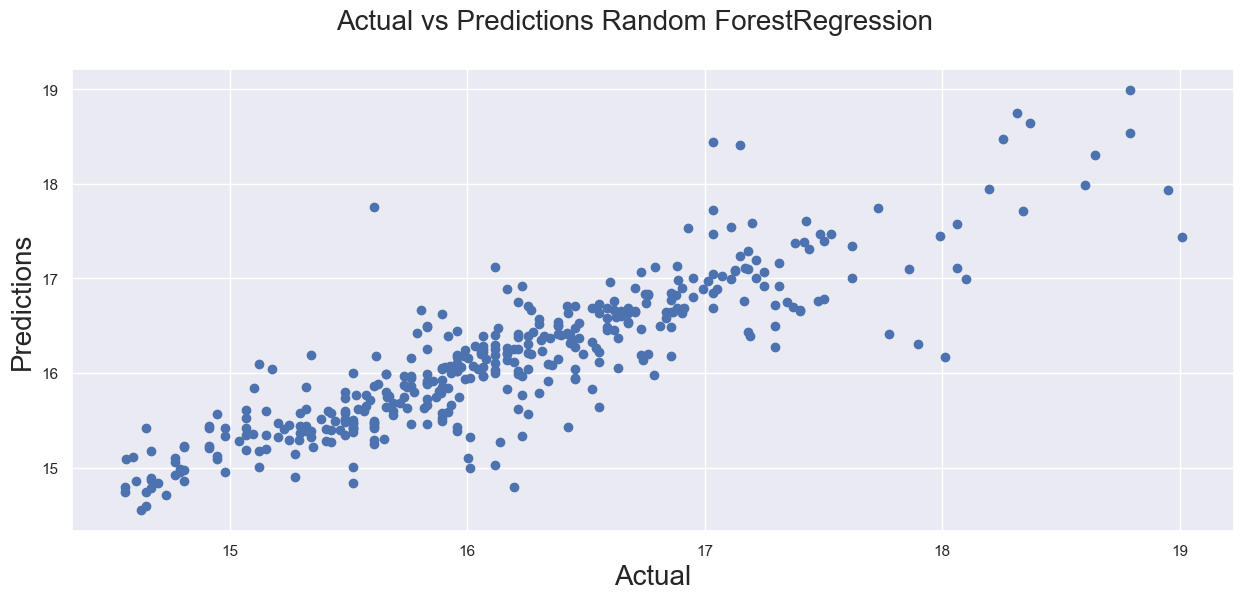

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[7])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [52]:
# Define models and their hyperparameters for GridSearchCV
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "l1_ratio": [0.2, 0.4, 0.6, 0.8]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [3, 5, 7, 9, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(),
        "params":{
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'n_estimators': [ 180, 200,300],
            'max_depth': [None, 5, 10,12,20],
            'min_samples_split': [4, 5, 10,15,20],
            'min_samples_leaf': [3, 5, 6,10,15],
        }
    },
    "ExtraTreeRegressor": {
        "model": ExtraTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [3, 5, 7, 9, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"],
        }
    },
    "SVR": {
        "model": SVR(kernel='rbf'),
        "params": {
            "gamma":["scale", "auto"],
            "C": [0.01, 0.1, 1, 10],
        }
    }
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    randomcv = RandomizedSearchCV(model, params, cv=5, n_jobs=-1)
    randomcv.fit(X_train, y_train)
    score = randomcv.score(X_train, y_train)
    y_pred = randomcv.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {randomcv.best_params_}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)

Model: Linear Regression
Best Parameters: {}
MAE: 911058074675.5472
RMSE: 3326713724646.1323
R-squared: -1.4882577762348343e+25

Model: Lasso
Best Parameters: {'alpha': 0.01}
MAE: 0.2617830994516446
RMSE: 0.38287482603280204
R-squared: 0.8028662762498062

Model: Ridge
Best Parameters: {'alpha': 20}
MAE: 0.23686396655125613
RMSE: 0.3715474962587415
R-squared: 0.8143581110725593

Model: Elastic Net
Best Parameters: {'l1_ratio': 0.2, 'alpha': 0.01}
MAE: 0.23721068865572512
RMSE: 0.36862841706901023
R-squared: 0.8172636595493373

Model: Decision Tree Regressor
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'friedman_mse'}
MAE: 0.4448817429801839
RMSE: 0.5679105461384144
R-squared: 0.5662822781941157

Model: RandomForestRegressor
Best Parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'friedman_mse'}
MAE: 0.3226429471883209
RMSE: 0.44788910

In [53]:
trainig_score

[0.9276154995986271,
 0.8917285993519936,
 0.927857393840147,
 0.9257598716019652,
 0.5376848541887405,
 0.8811068811683137,
 0.7443065217816913,
 0.9584514328197201]

Text(0, 0.5, 'Predictions')

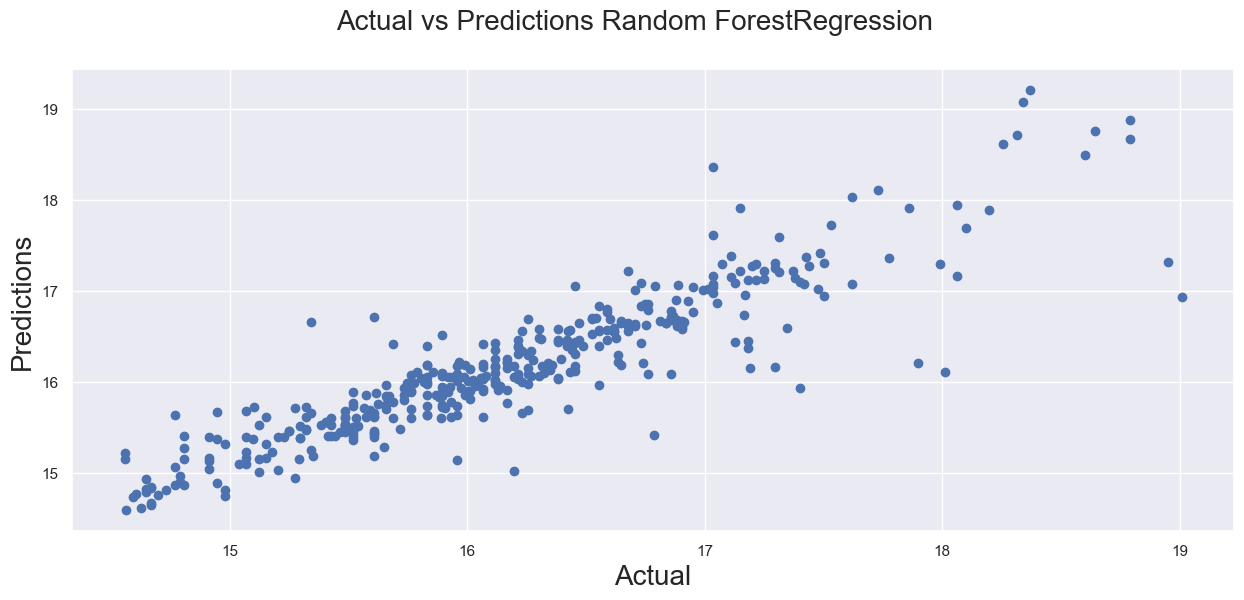

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[3])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [56]:
data.to_csv("mumbaihouse.csv",index=False)

In [57]:
data

,Area,Location,No_of_Bedrooms,New_Resale,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,24x7_Security,Childrens_Play_Area,Clubhouse,Intercom,Landscaped_Gardens,Indoor_Games,Gas_Connection,Jogging_Track,Swimming_Pool,PRICE
0,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,2300000
1995,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0,2000000
1996,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1,8300000
1997,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0,7400000
